In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

App Ideas:
- Create new fantasy variable that calculates ESPN fantasy points
- Plot/show 10 players with highest average points, rebs, fantasy points, etc (interactable)
- Look up a player, show best games
- Look up a team?
- Compare two players?

Graph Ideas:
- Team wins line chart
- Each team ppg vs league average
- Assist vs turnover scatterplot (plotly?)
- FPoints vs mins

In [36]:
# Read in the data scraped above
boxdf = pd.read_csv('boxScores.csv')
boxdf.columns


Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
       'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS',
       'FANTASY'],
      dtype='object')

In [37]:
# Create a new df that is the sums of stats
# Create a new df that is the averages per game of stats

# Both of these are one row per player.
totals = boxdf.groupby(['PLAYER_NAME','TEAM_NAME'], as_index = False).sum()
totals['Rank'] = totals['FANTASY'].rank(ascending = False)
totals

,PLAYER_NAME,TEAM_NAME,PLAYER_ID,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY,Rank
0,A.J. Lawson,Minnesota Timberwolves,1630639,1610612750,22200212,2,1,1,1.000,0,...,1,0,0,0,0,1,2,-5,4,465.5
1,AJ Green,Milwaukee Bucks,14681340,14495514741,199802455,48,7,14,1.584,6,...,7,2,1,0,1,7,23,-19,42,404.0
2,AJ Griffin,Atlanta Hawks,34253100,33822867477,466204467,413,80,176,9.065,33,...,43,18,24,1,16,24,202,-20,366,201.0
3,Aaron Gordon,Denver Nuggets,4282572,33822867603,466203773,618,134,217,12.529,23,...,141,48,14,17,30,38,349,113,691,73.0
4,Aaron Holiday,Atlanta Hawks,35837736,35433480214,488403737,390,38,92,8.115,15,...,34,33,13,5,19,37,103,5,233,278.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Zach Collins,San Antonio Spurs,22797320,22548578626,310802145,264,45,95,6.913,10,...,75,38,9,14,28,49,111,-79,299,235.0
478,Zach LaVine,Chicago Bulls,4077940,32212254820,444003997,685,155,367,8.302,59,...,94,85,26,1,47,48,443,-36,708,65.0
479,Zeke Nnaji,Denver Nuggets,29343456,28991029374,399603568,179,33,56,8.131,3,...,25,4,3,3,9,26,77,-62,127,336.0
480,Ziaire Williams,Memphis Grizzlies,1630533,1610612763,22200368,19,2,9,0.222,0,...,6,3,2,0,0,3,4,15,19,432.0


In [38]:

means = boxdf.groupby(['PLAYER_NAME', 'TEAM_NAME'], as_index = False).mean()
means['Rank'] = means['FANTASY'].rank(ascending = False)
means

,PLAYER_NAME,TEAM_NAME,PLAYER_ID,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY,Rank
0,A.J. Lawson,Minnesota Timberwolves,1630639.0,1.610613e+09,2.220021e+07,2.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-5.000000,4.000000,437.5
1,AJ Green,Milwaukee Bucks,1631260.0,1.610613e+09,2.220027e+07,5.333333,0.777778,1.555556,0.396000,0.666667,...,0.777778,0.222222,0.111111,0.000000,0.111111,0.777778,2.555556,-2.111111,4.666667,428.0
2,AJ Griffin,Atlanta Hawks,1631100.0,1.610613e+09,2.220021e+07,19.666667,3.809524,8.380952,0.431667,1.571429,...,2.047619,0.857143,1.142857,0.047619,0.761905,1.142857,9.619048,-0.952381,17.428571,216.0
3,Aaron Gordon,Denver Nuggets,203932.0,1.610613e+09,2.220018e+07,29.428571,6.380952,10.333333,0.596619,1.095238,...,6.714286,2.285714,0.666667,0.809524,1.428571,1.809524,16.619048,5.380952,32.904762,69.0
4,Aaron Holiday,Atlanta Hawks,1628988.0,1.610613e+09,2.220017e+07,17.727273,1.727273,4.181818,0.405750,0.681818,...,1.545455,1.500000,0.590909,0.227273,0.863636,1.681818,4.681818,0.227273,10.590909,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Zach Collins,San Antonio Spurs,1628380.0,1.610613e+09,2.220015e+07,18.857143,3.214286,6.785714,0.493786,0.714286,...,5.357143,2.714286,0.642857,1.000000,2.000000,3.500000,7.928571,-5.642857,21.357143,173.0
478,Zach LaVine,Chicago Bulls,203897.0,1.610613e+09,2.220020e+07,34.250000,7.750000,18.350000,0.415100,2.950000,...,4.700000,4.250000,1.300000,0.050000,2.350000,2.400000,22.150000,-1.800000,35.400000,50.0
479,Zeke Nnaji,Denver Nuggets,1630192.0,1.610613e+09,2.220020e+07,9.944444,1.833333,3.111111,0.542067,0.166667,...,1.388889,0.222222,0.166667,0.166667,0.500000,1.444444,4.277778,-3.444444,7.055556,381.0
480,Ziaire Williams,Memphis Grizzlies,1630533.0,1.610613e+09,2.220037e+07,19.000000,2.000000,9.000000,0.222000,0.000000,...,6.000000,3.000000,2.000000,0.000000,0.000000,3.000000,4.000000,15.000000,19.000000,200.0


In [39]:
means['MIN'].mean()

19.569505424854892

Text(0.5, 0, 'Total Turnovers')

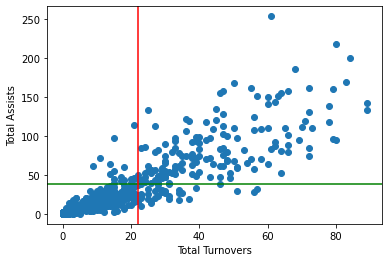

In [40]:
# Scatterplot for assists vs. turnovers
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(totals['TOV'], totals['AST'])
plt.axhline(y = totals['AST'].mean(), color = 'g', label = 'Average Total Turnovers')
plt.axvline(x = totals['TOV'].mean(), color = 'r')
plt.ylabel('Total Assists')
plt.xlabel('Total Turnovers')

# Need to put in a minutes minimum
# For the app:choose which team to filter by

In [41]:
fig = px.scatter(totals, x = 'TOV', y ='AST',
    title = 'Total Assists vs. Total Turnovers',
    hover_data = ['PLAYER_NAME', 'TEAM_NAME'], 
    width = 500, height = 500)
fig.show()
# fig.to_html(full_html = False, include_plotlyjs = 'cdn')

Text(0, 0.5, 'Average points scored')

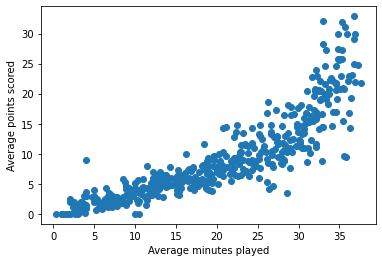

In [42]:
# Scatterplot for points vs. mins (maybe with a minimum minutes threshold)
fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = fig.add_subplot()
ax.scatter(means['MIN'], means['PTS'])
plt.xlabel('Average minutes played')
plt.ylabel('Average points scored')


Things to make dynamic here:
- Category (can be points, rebounds, assists, fantasy points, etc)
- updating category should also update the average bar
- top n players (from like 3 to 25) With a selection bar?
- Counts vs average? or both?

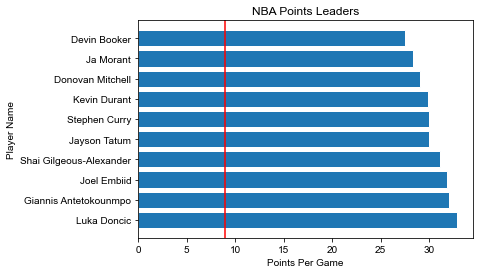

In [43]:
# Top 15 most points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Points Leaders')
plt.xlabel('Points Per Game')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
points = means['PTS'].sort_values(ascending = False).head(10)
ax.barh(means.iloc[points.index]['PLAYER_NAME'], points)
ax.axvline(means['PTS'].mean(), color = 'r')

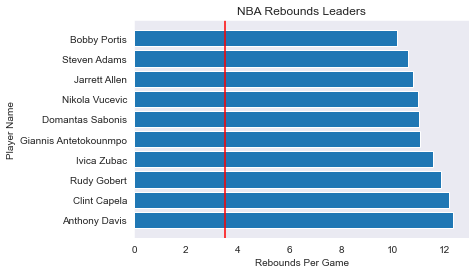

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Rebounds Leaders')
plt.xlabel('Rebounds Per Game')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
rebounds = means['REB'].sort_values(ascending = False).head(10)
ax.barh(means.iloc[rebounds.index]['PLAYER_NAME'], rebounds)
ax.axvline(means['REB'].mean(), color = 'r')

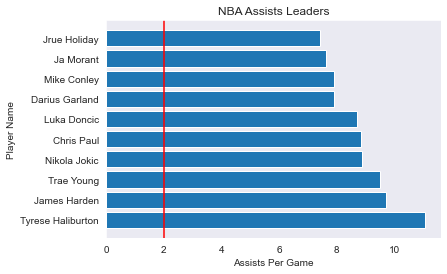

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Assists Leaders')
plt.xlabel('Assists Per Game')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
assists = means['AST'].sort_values(ascending = False).head(10)
ax.barh(means.iloc[assists.index]['PLAYER_NAME'], assists)
ax.axvline(means['AST'].mean(), color = 'r')

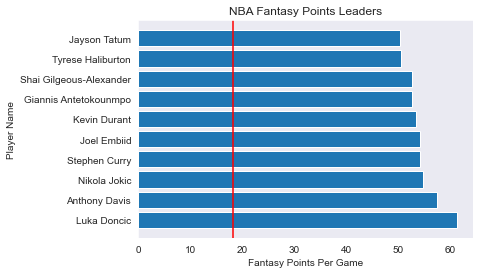

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Fantasy Points Leaders')
plt.xlabel('Fantasy Points Per Game')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
points = means['FANTASY'].sort_values(ascending = False).head(10)
ax.barh(means.iloc[points.index]['PLAYER_NAME'], points)
ax.axvline(means['FANTASY'].mean(), color = 'r')

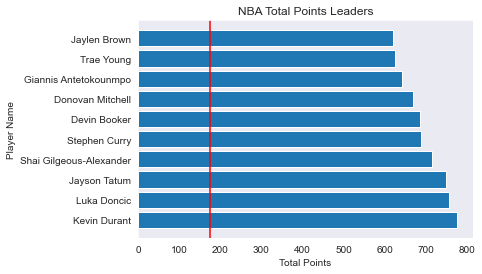

In [47]:
# Top 10 most points total (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Total Points Leaders')
plt.xlabel('Total Points')
plt.ylabel('Player Name')
# Get a list of top 10 total points and the player names
points = totals['PTS'].sort_values(ascending = False).head(10)
ax.barh(totals.iloc[points.index]['PLAYER_NAME'], points)
ax.axvline(totals['PTS'].mean(), color = 'r')

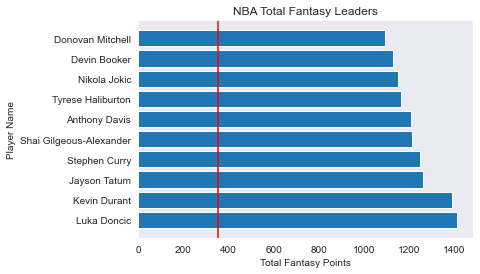

In [48]:
# Top 10 most fantasy points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Total Fantasy Leaders')
plt.xlabel('Total Fantasy Points')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
fpoints = totals['FANTASY'].sort_values(ascending = False).head(10)
ax.barh(totals.iloc[fpoints.index]['PLAYER_NAME'], fpoints)
ax.axvline(totals['FANTASY'].mean(), color = 'r')

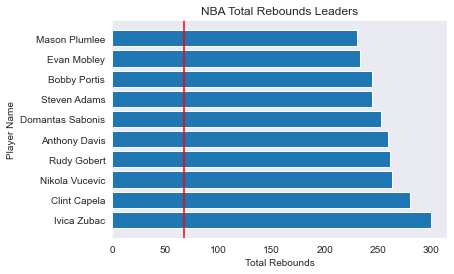

In [49]:
# Top 10 most fantasy points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Total Rebounds Leaders')
plt.xlabel('Total Rebounds')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
rebounds = totals['REB'].sort_values(ascending = False).head(10)
ax.barh(totals.iloc[rebounds.index]['PLAYER_NAME'], rebounds)
ax.axvline(totals['REB'].mean(), color = 'r')

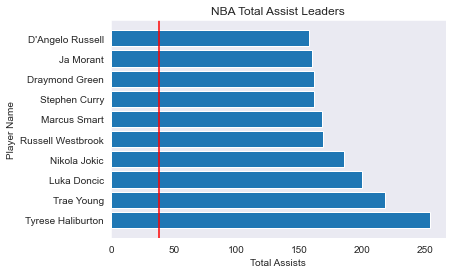

In [50]:
# Top 10 most fantasy points average (with the league average included)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('dark')
plt.title('NBA Total Assist Leaders')
plt.xlabel('Total Assists')
plt.ylabel('Player Name')
# Get a list of top 15 average points, and the average points
fpoints = totals['AST'].sort_values(ascending = False).head(10)
ax.barh(totals.iloc[fpoints.index]['PLAYER_NAME'], fpoints)
ax.axvline(totals['AST'].mean(), color = 'r')

In [51]:
means.iloc[points.index]['PLAYER_NAME']

279               Kevin Durant
305                Luka Doncic
215               Jayson Tatum
414    Shai Gilgeous-Alexander
418              Stephen Curry
114               Devin Booker
122           Donovan Mitchell
151      Giannis Antetokounmpo
441                 Trae Young
212               Jaylen Brown
Name: PLAYER_NAME, dtype: object

Search for a player and compare their stats
- show average mins/game
- show average fantasy points/game
- show their location in boxplot distributions


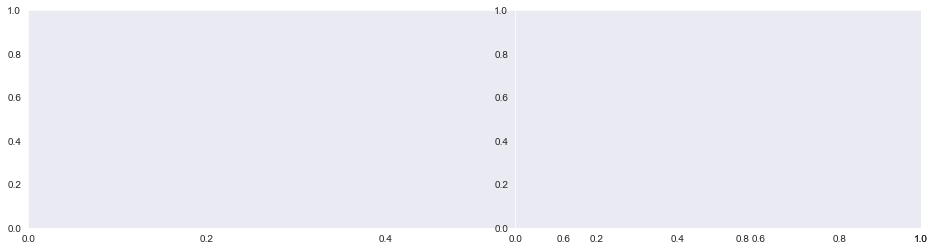

In [52]:
fig = plt.figure(figsize = (16, 4))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(122)
# Top 15 most rebounds average (with league average included)

# Top 15 counts rebounds (with weighted league average included)

In [53]:
means['RATE'] = means['FANTASY'] / means['MIN']
fig = px.scatter(means, x = 'MIN', y ='FANTASY',
    title = 'Average Fantasy Points per Minute',
    hover_data = ['PLAYER_NAME', 'TEAM_NAME', 'RATE'], 
    width = 600, height = 600)
fig.show()
# fig.to_html(full_html = False, include_plotlyjs = 'cdn')

In [54]:
adp = pd.read_csv('nba-adp-All.csv')

In [55]:
# Join mean data with the average draft position data
compare = pd.merge(means, adp, left_on = 'PLAYER_NAME', right_on = 'Name')
# Change average draft position column to a float for numerical computations
compare['AVG'] = compare['AVG'].astype(float)
# Create a new variable that shows the difference between expected rank and actual rank
compare['Difference'] = compare['AVG'] - compare['Rank']
compare.columns

Index(['PLAYER_NAME', 'TEAM_NAME', 'PLAYER_ID', 'TEAM_ID', 'GAME_ID', 'MIN',
       'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'FANTASY', 'Rank', 'RATE', 'Unnamed: 0', 'Name',
       'Team', 'Pos', 'AVG', 'ESPN', 'CBS', 'Yahoo', 'Underdog', 'Fantrax',
       'ESPN AAV', 'Status', 'Injury', 'Difference'],
      dtype='object')

In [61]:
chart = px.scatter(data_frame = compare, x = 'Difference', y = 'Rank',
color = 'Pos', title = 'How Are Players Doing Against Their Expectations?',
hover_data = ['AVG', 'FANTASY', 'Name', 'TEAM_NAME'],
height = 500, width = 800)
chart.update_yaxes(autorange = 'reversed')
chart.show()
chart.to_html(full_html = False, include_plotlyjs = 'cdn')

'<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: \'local\'};</script>\n        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="c295f119-f8fd-4c15-a2d1-a5ef547b324d" class="plotly-graph-div" style="height:500px; width:800px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("c295f119-f8fd-4c15-a2d1-a5ef547b324d")) {                    Plotly.newPlot(                        "c295f119-f8fd-4c15-a2d1-a5ef547b324d",                        [{"customdata":[[364.8,17.428571428571427,"AJ Griffin","Atlanta Hawks"],[121.1,32.904761904761905,"Aaron Gordon","Denver Nuggets"],[364.1,15.714285714285714,"Aaron Nesmith","Indiana Pacers"],[140.0,8.666666666666666,"Admiral Schofield","Orlando Magic"],[151.2,23.363636363636363,"Aleksej Pokusevski","Oklahoma City Thunder"],[140.0